## Seasonal river forcing

For one of the experiments in this chapter, I test how significant incorporating a seasonal cycle in riverine Mn concentrations is. This is based on Manuel Colombo's estimates of potential maximum Mn concentrations during peak flow (in Colombo et al., 2019). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
imin, imax = 1479, 2179
jmin, jmax = 159, 799

# colors:
color_glac = '#0873b4'
color_cont = '#ab5c29'
color_other= '#757575'

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


#### Functions

In [9]:
def normalize(variable):
    
    norm_variable = variable/np.amax(variable)
    
    return norm_variable

#### Load files

In [4]:
file_model  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y2015.nc')
model_lons  = np.array(file_model.variables['nav_lon'])
model_lats  = np.array(file_model.variables['nav_lat'])
model_river = np.array(file_model.variables['runoff'])

In [5]:
rclass      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class-202005.nc','r')
river_class = np.array(rclass.variables['rclass'])

In [11]:
# Mask for sub-domain:
domain_mask = np.zeros((12,model_lons.shape[0],model_lons.shape[1]))
domain_mask[:,imin:imax,jmin:jmax] = 1

In [12]:
# Load seasonal river forcing:
dMn_rivers = np.zeros((12, river_class.shape[0], river_class.shape[1]))

for month in range(1,13):
    m1 = xr.open_dataset(f'/ocean/brogalla/GEOTRACES/data/paper2-forcing-files/river_seasonal_m{month:02}.nc')
    dMn_rivers[month-1,:,:] = m1['dmn_rivers'].values

dMn_rivers = np.ma.masked_where(domain_mask==0, dMn_rivers)

#### Figure

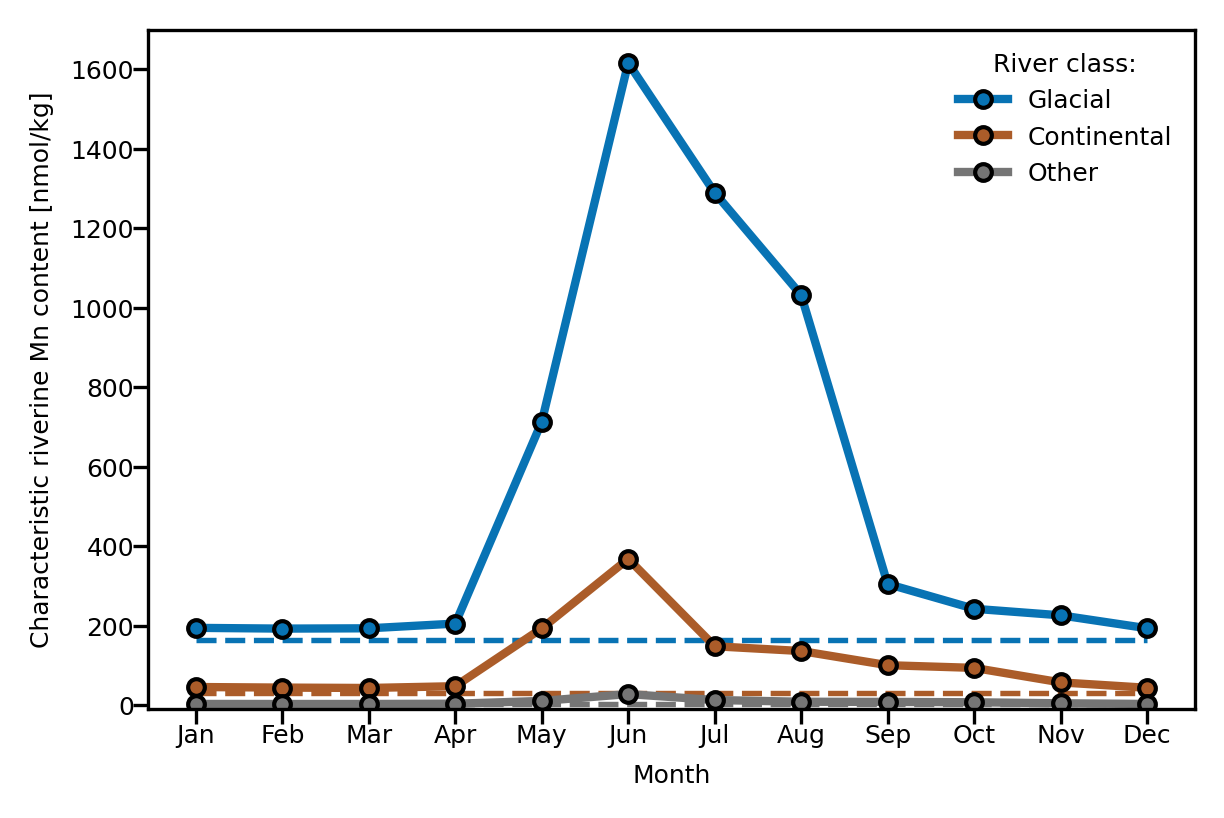

In [36]:
fig, ax = plt.subplots(1,1, figsize=(4.5,3.0), dpi=300)

ax.plot(months, np.ones(len(months))*164 , '--', linewidth=1.3, c=color_glac)
ax.plot(months, np.ones(len(months))*29.8, '--', linewidth=1.3, c=color_cont)
ax.plot(months, np.ones(len(months))*2.2 , '--', linewidth=1.3, c=color_other)

ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==1.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_glac, label='Glacial')
ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==2.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_cont, label='Continental')
ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==3.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_other, label='Other')

ax.set_ylim(-10,1700)
ax.set_xlabel('Month', fontsize=6)
ax.set_ylabel('Characteristic riverine Mn content [nmol/kg]', fontsize=6)
ax.tick_params(axis='both', labelsize=6, pad=-0.1)

leg = ax.legend(frameon=False, fontsize=6)
leg.set_title('River class:', prop={'size':6})
# fig.suptitle('Mean river Mn forcing climatology', fontsize=8)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/M2-seasonal-cycle.png', bbox_inches='tight', dpi=300)